(0) Importing Libraries

In [471]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

------------------------------------------------------------------------------------

(1) Data Loading

In [475]:
# Data can be found at: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
file = "Sleep_health_and_lifestyle_dataset.csv"

# Index of dataframe: Person ID
df = pd.read_csv(file, index_col = 0)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [477]:
# Show Columns
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

------------------------------------------------------------------------------------

(2) Basic EDAs

<Axes: xlabel='Gender', ylabel='count'>

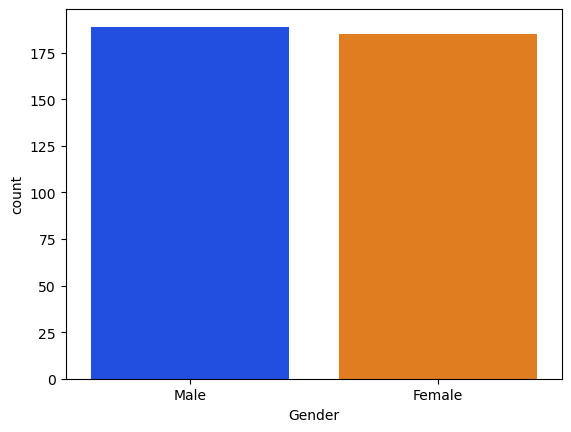

In [481]:
# Countplot that shows the division by 'Gender'
sns.countplot(data = df, x = 'Gender', hue='Gender', palette = 'bright')

<Axes: xlabel='Age', ylabel='count'>

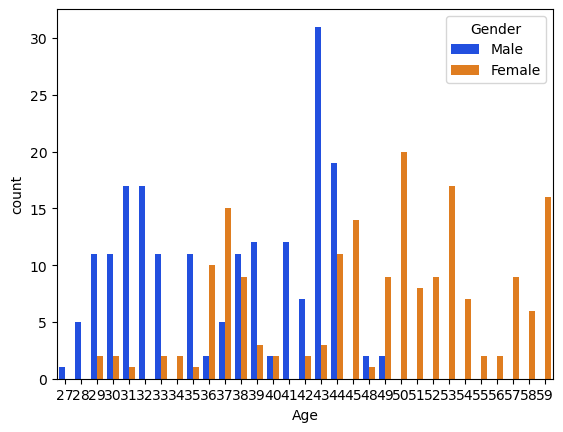

In [483]:
# Countplot that shows the division by both 'Gender' and 'Age'
sns.countplot(data = df, x = 'Age', hue='Gender', palette = 'bright')

<Axes: xlabel='BMI Category', ylabel='count'>

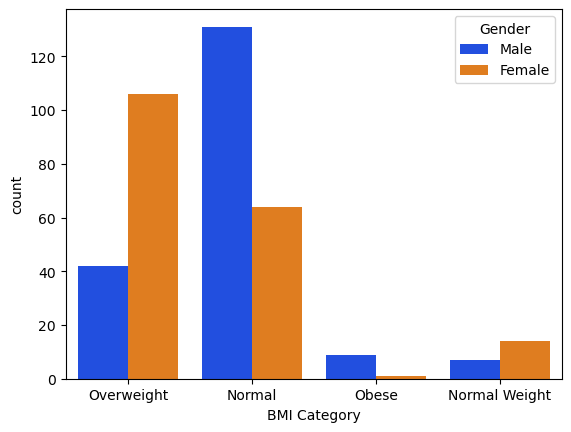

In [484]:
# Countplot that shows the division by both 'Gender' and 'BMI'
sns.countplot(data = df, x = 'BMI Category', hue='Gender', palette = 'bright')

In [486]:
# Shows information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [489]:
# Shows statistics of dataframe
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


------------------------------------------------------------------------------------

(3) Data Cleaning

In [493]:
# Show counts of empty values per column
df.isna().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [495]:
# Convert 'Sleep Disorder' so null values => 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].map(
    lambda x: 'None' if pd.isna(x) else x
)

In [497]:
# Show counts of empty values per column
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

<Axes: xlabel='Sleep Disorder', ylabel='count'>

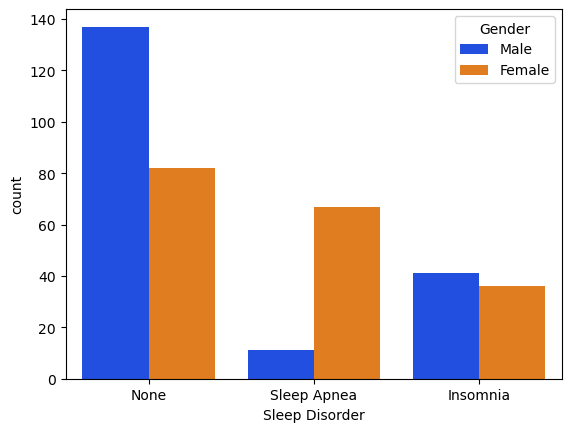

In [499]:
# Countplot that shows the division by both 'Gender' and 'Sleep Disorder'
sns.countplot(data = df, x = 'Sleep Disorder', hue='Gender', palette = 'bright')

In [501]:
# Show unique values of 'BMI Category'
df['BMI Category'].unique()

# Drop 'BMI Category' because there is 'Normal' and 'Normal Weight'
df.drop('BMI Category', axis=1, inplace=True)

In [503]:
# Show Columns now that have dropped 'BMI Category'
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Blood Pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

------------------------------------------------------------------------------------

(4) Data Transformation

In [507]:
# Convert 'Sleep Disorder' to Numeric
# 0: No sleep disorder
# 1: Sleep Apnea
# 2: Insomnia
df['Sleep Disorder'] = df['Sleep Disorder'].map(
    lambda x: 0 if x=='None' else 1 if x=='Sleep Apnea' else 2
)

In [509]:
# Convert 'Gender' to Numeric
# 0: Male
# 1: Female
df['Gender'] = df['Gender'].map(
    lambda x: 0 if x == 'Male' else 1
)

In [511]:
# Shows information of dataframe
# Keeping 'Blood Pressure' and 'Occupation' but not using them
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   Blood Pressure           374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 35.1+ KB


In [513]:
# Shows statistics of dataframe
df.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.494652,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.620321
std,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.805620
min,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000
25%,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000
50%,0.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000
75%,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000
max,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,2.000000


------------------------------------------------------------------------------------

(5) Data Visualization

<Axes: >

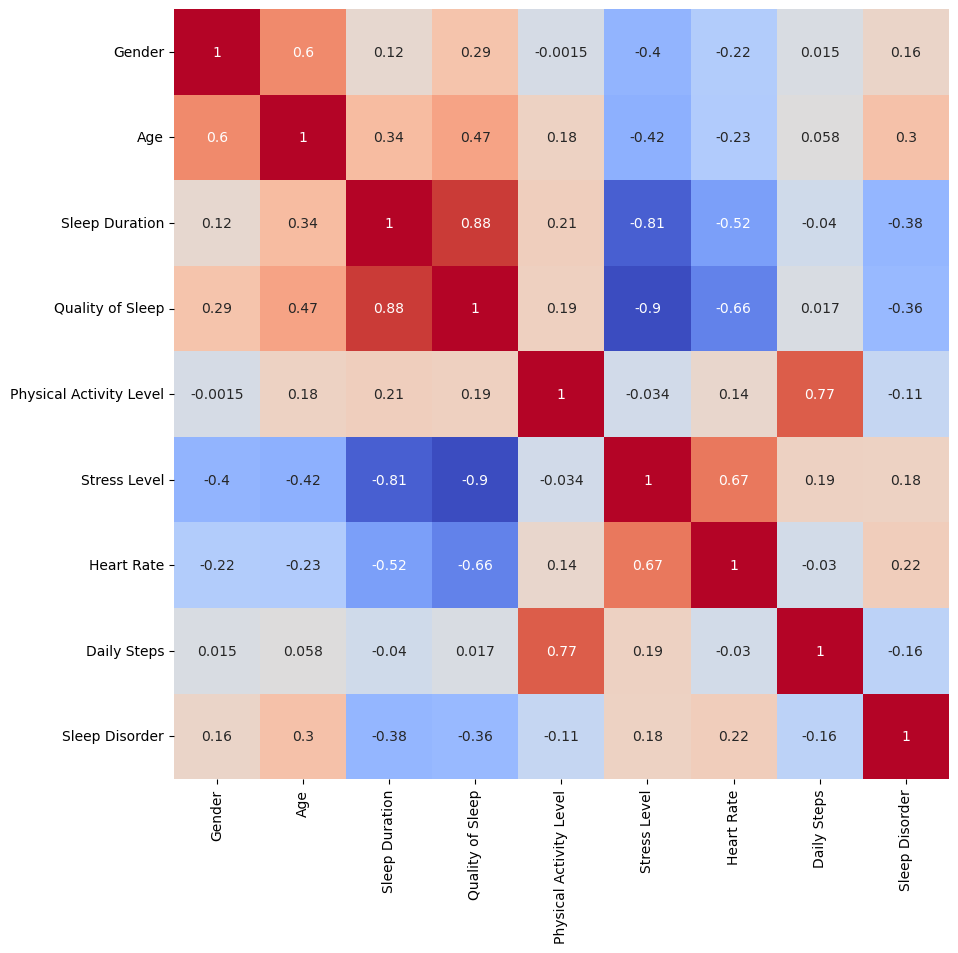

In [517]:
# Shows correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(
    data = df.drop(['Occupation', 'Blood Pressure'], axis=1).corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    cbar = False)

Text(0.5, 1.02, 'Statistics')

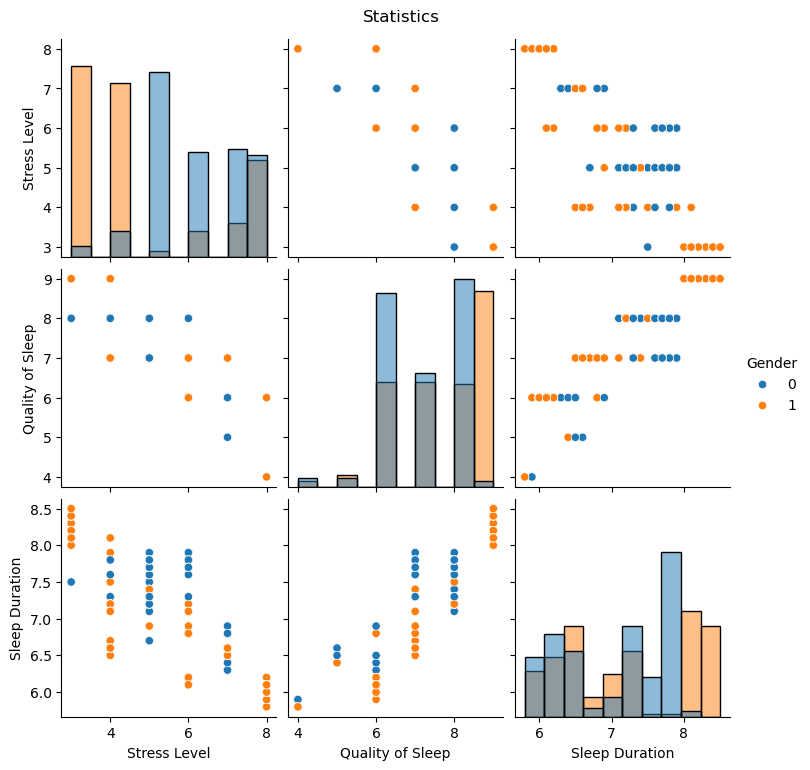

In [519]:
# Pairplot that shows the distribution of 'Stress Level', 'Quality of Sleep', 'Sleep Duration', and 'Gender' (hue)
graph = sns.pairplot(data = df[['Stress Level', 'Quality of Sleep', 'Sleep Duration', 'Gender']], hue='Gender', diag_kind = 'hist')

graph.fig.suptitle("Statistics", y=1.02)

Text(0.5, 1.02, 'Statistics')

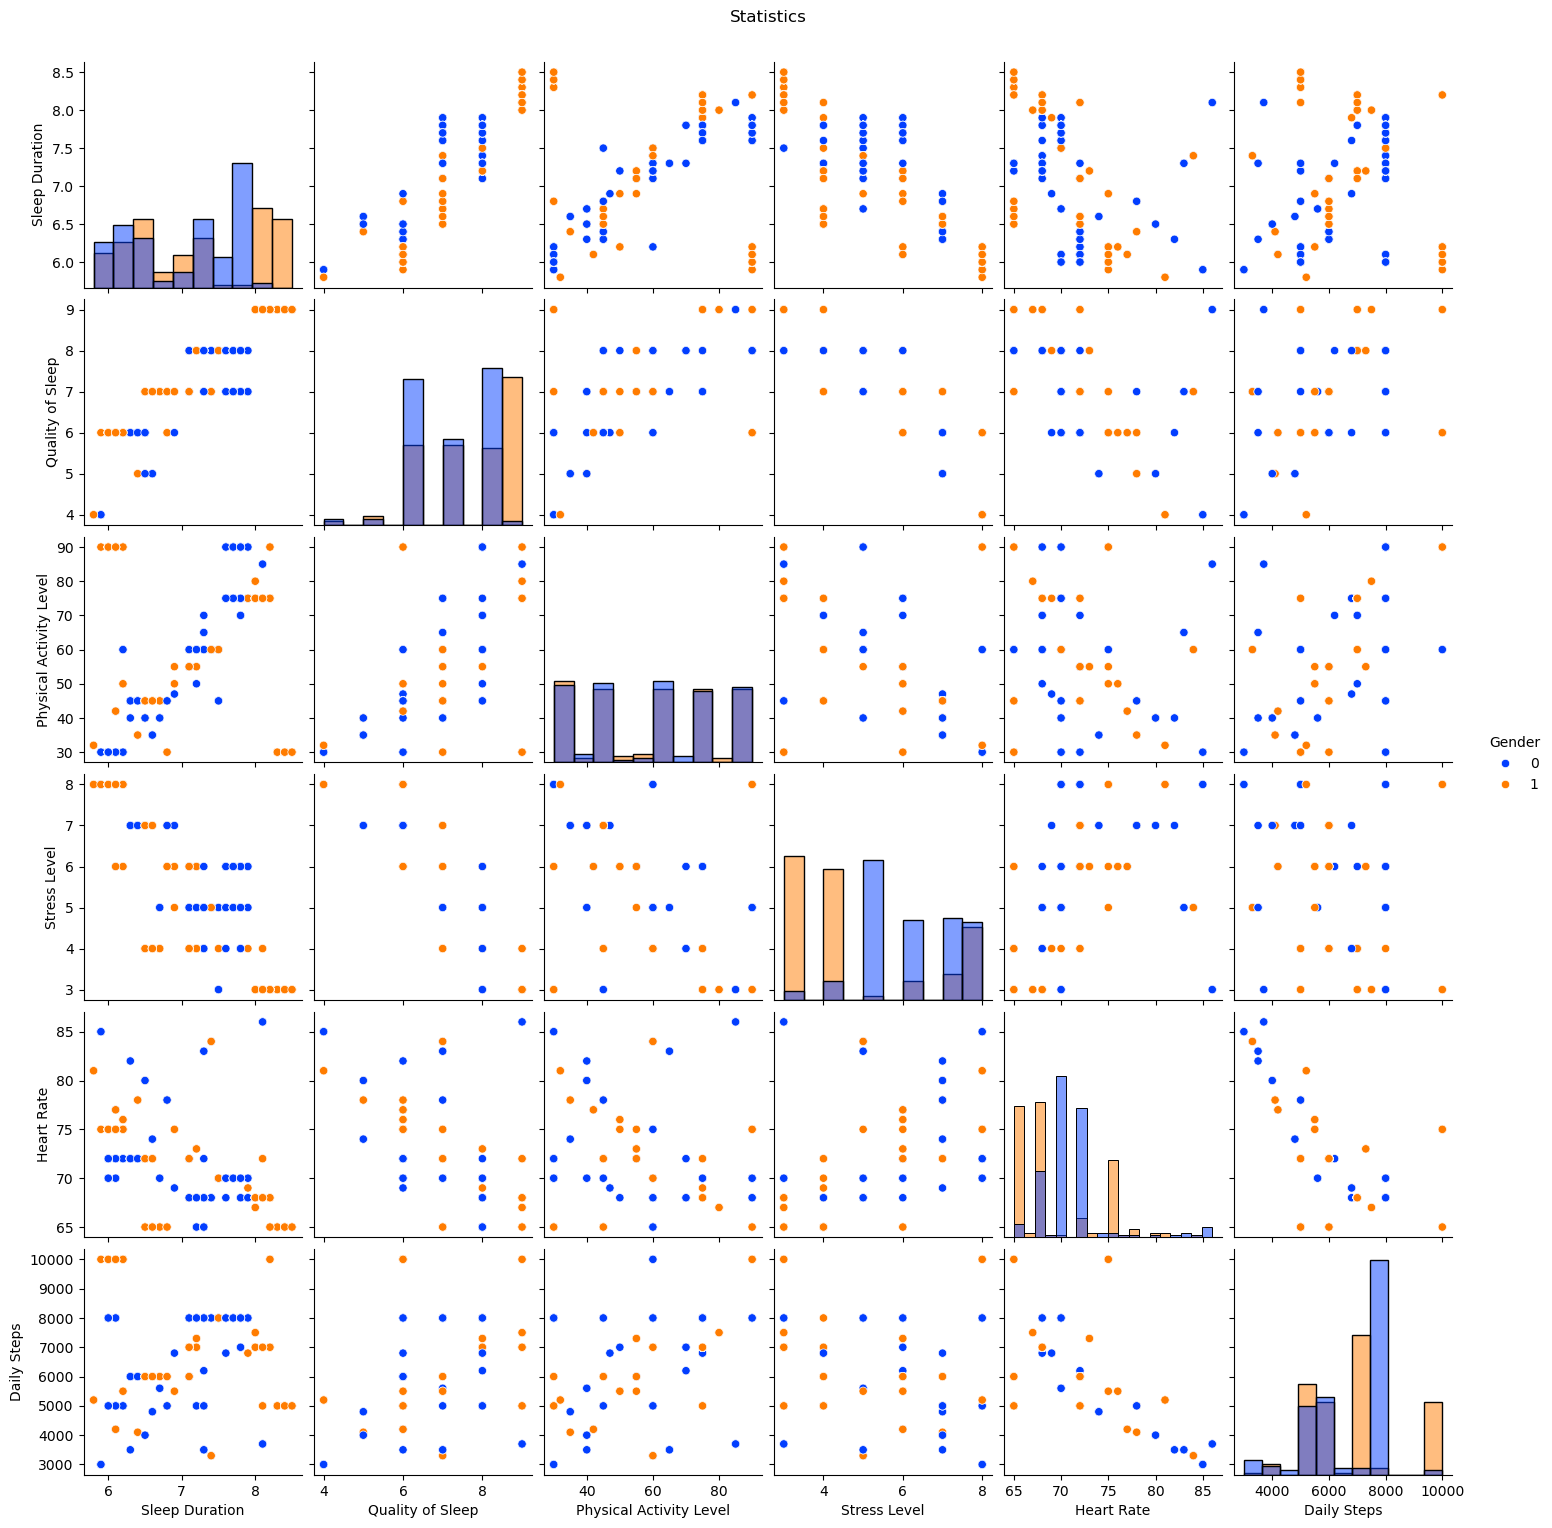

In [520]:
# Pairplot that shows the distribution by Gender
graph = sns.pairplot(data = df.drop(['Sleep Disorder', 'Age'], axis=1), hue = 'Gender', diag_kind = 'hist', palette = 'bright')

graph.fig.suptitle("Statistics", y=1.02)

Text(0.5, 1.02, 'Statistics')

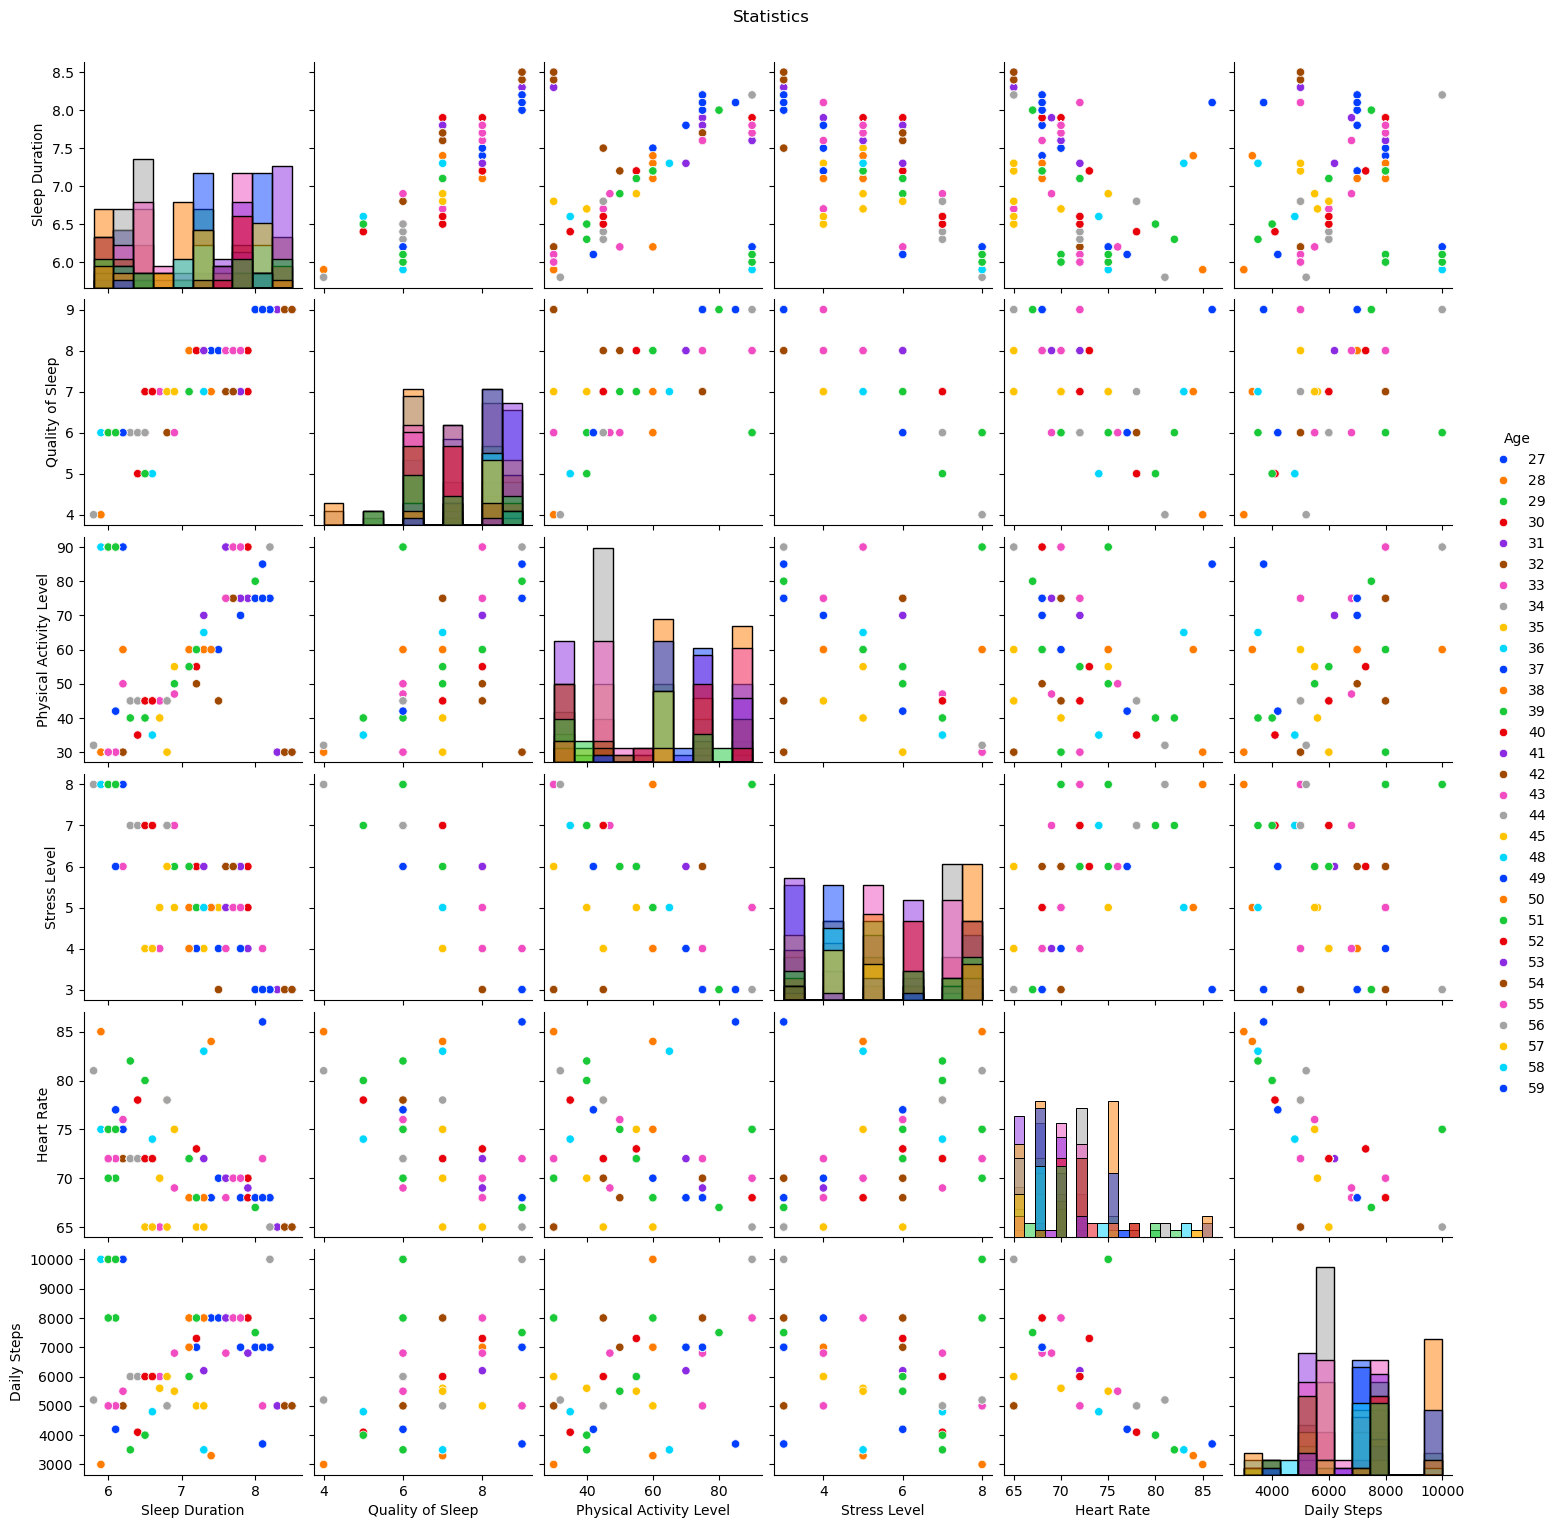

In [521]:
# Pairplot that shows the distribution by Age
graph = sns.pairplot(data = df.drop(['Sleep Disorder', 'Gender'], axis=1), hue = 'Age', diag_kind = 'hist', palette = 'bright')

graph.fig.suptitle("Statistics", y=1.02)

<Axes: xlabel='Age'>

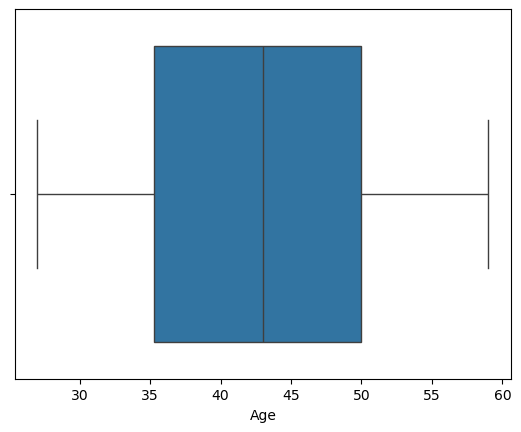

In [522]:
sns.boxplot(data = df.drop('Blood Pressure', axis=1), x = 'Age')

------------------------------------------------------------------------------------

(6) Building a Model - Linear Regression

In [526]:
# 1. Prepare data
X = df.drop(['Sleep Duration', 'Occupation', 'Blood Pressure'], axis=1)
y = df['Sleep Duration']

In [527]:
# 2. Feature scaling is important for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [528]:
# 3. Convert sleep duration to categories first
# 0: Short Sleep (Less than 6.5 hours)
# 1: Normal Sleep (6.5 - 7.5 hours)
# 2: Long Sleep
def categorize_sleep(duration):
    if duration < 6.5:
        return 0
    elif duration <= 7.5:
        return 1
    else:
        return 2

y_categorized = y.apply(categorize_sleep)

<Axes: xlabel='Sleep Duration', ylabel='count'>

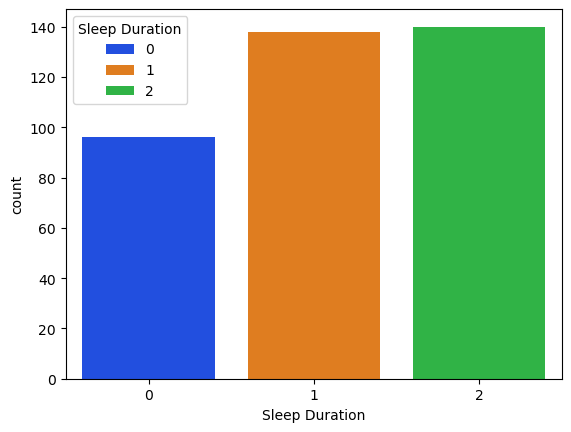

In [618]:
# Distribution of y_categorized
sns.countplot(x=y_categorized, hue = y_categorized, palette = "bright")

In [530]:
# 4. Split the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_categorized,
    test_size=0.3, 
    random_state=101,
    stratify=y_categorized
)

In [532]:
# 5. Use Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [533]:
# 6. Fit and predict
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [534]:
# 7. Convert Predictions with Discrete Categories

# Convert predictions to discrete categories
predicted_categories = predictions.round().astype(int)

# Ensure predicted categories align with your original category labels
predicted_categories = np.clip(predicted_categories, 0, 2)

In [545]:
# 8. Evaluate
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_categories))
print("\nClassification Report:")
print(classification_report(y_test, predicted_categories))
print("\nF1 Score:")
print(f1_score(y_test, predicted_categories, average="weighted"))

Confusion Matrix:
[[26  3  0]
 [ 7 32  3]
 [ 0  9 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.73      0.76      0.74        42
           2       0.92      0.79      0.85        42

    accuracy                           0.81       113
   macro avg       0.81      0.81      0.81       113
weighted avg       0.81      0.81      0.81       113


F1 Score:
0.8063438596204531


------------------------------------------------------------------------------------

(6.1) Building a Model - RandomForestClassifier

In [549]:
# Done with Linear Regression:
# 1. Prepare data
# 2. Feature scaling
# 3. Convert target to categories
# 4. Split the data using train_test_split

In [551]:
# 5. Instead of LinearRegression, use a RandomForestClassifier
# Usually performs better than linear models
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=101,
    class_weight='balanced'
)

In [553]:
# 6. Fit and predict
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


In [555]:
# 7. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nF1 Score:")
print(f1_score(y_test, predictions, average="weighted"))

Confusion Matrix:
[[27  2  0]
 [ 0 41  1]
 [ 0  0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.95      0.98      0.96        42
           2       0.98      1.00      0.99        42

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113


F1 Score:
0.9733434966907115


In [557]:
# 8. Feature ranking (Importance of each feature)
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importance ranking
print("\nFeature Importance Ranking:")
print(feature_importances)


Feature Importance Ranking:
                   Feature  Importance
2         Quality of Sleep    0.229931
3  Physical Activity Level    0.206962
4             Stress Level    0.198061
1                      Age    0.147811
5               Heart Rate    0.113871
6              Daily Steps    0.061318
7           Sleep Disorder    0.022983
0                   Gender    0.019065


------------------------------------------------------------------------------------

(6.2) Building a Model - SVM

In [409]:
# Done with Linear Regression:
# 1. Prepare data
# 2. Feature scaling
# 3. Convert target to categories
# 4. Split the data using train_test_split

In [411]:
# 5. Use SVC
from sklearn.svm import SVC
svmodel = SVC(
    kernel='linear',
    class_weight='balanced',
    random_state=101
)

In [413]:
# 6. Fit and predict
svmodel.fit(X_train, y_train)
predictions = svmodel.predict(X_test)

In [415]:
# 7. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nF1 Score:")
print(f1_score(y_test, predictions, average="weighted"))

Confusion Matrix:
[[28  1  0]
 [ 5 26 11]
 [ 1  1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.93      0.62      0.74        42
           2       0.78      0.95      0.86        42

    accuracy                           0.83       113
   macro avg       0.85      0.85      0.83       113
weighted avg       0.85      0.83      0.82       113


F1 Score:
0.8239540711136487


------------------------------------------------------------------------------------

(6.3) Building a Model - PCA

In [581]:
# Done with Linear Regression:
# 1. Prepare data
# 2. Feature scaling
# 3. Convert target to categories

In [583]:
# 4. Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [585]:
# 5. Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance ratio:", np.cumsum(pca.explained_variance_ratio_))
print("Number of components chosen:", pca.n_components_)

Explained variance ratio: [0.37872645 0.23047471 0.19476686 0.07416037 0.06870134 0.03861067]
Cumulative variance ratio: [0.37872645 0.60920116 0.80396802 0.87812839 0.94682973 0.9854404 ]
Number of components chosen: 6


In [587]:
# 6. Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, 
    y_categorized,
    test_size=0.3,
    random_state=101,
    stratify=y_categorized
)

In [589]:
# 7. Train classifier (RandomForestClassifier)
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=101,
    class_weight='balanced'
)

In [591]:
# 8. Fit and predict
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [593]:
# 9. Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nF1 Score:")
print(f1_score(y_test, predictions, average="weighted"))


Confusion Matrix:
[[24  5  0]
 [ 2 40  0]
 [ 0  3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.83      0.95      0.89        42
           2       1.00      0.93      0.96        42

    accuracy                           0.91       113
   macro avg       0.92      0.90      0.91       113
weighted avg       0.92      0.91      0.91       113


F1 Score:
0.9122731742200768


In [595]:
# 10. Feature Ranking based on PCA components
# Principal components represent combinations of the original features. The loadings of each component are the coefficients of the original features.

# Get the loadings for each component
loadings = pca.components_

# Create a DataFrame to rank original features by their contribution to each component
loading_df = pd.DataFrame(loadings, columns=X.columns)

# Rank the features by their contribution to each principal component
feature_importance = loading_df.abs().mean(axis=0).sort_values(ascending=False)

print("\nFeature Importance Ranking based on PCA Loadings:")
print(feature_importance)


Feature Importance Ranking based on PCA Loadings:
Gender                     0.349122
Sleep Disorder             0.340348
Age                        0.310429
Heart Rate                 0.303847
Physical Activity Level    0.266780
Stress Level               0.259997
Daily Steps                0.212615
Quality of Sleep           0.204500
dtype: float64


------------------------------------------------------------------------------------

(7) Hyperparameter Tuning

Improving SVM - RandomizedSearchCV (1st)

In [606]:
# Done with Linear Regression:
# 1. Prepare data
# 2. Feature scaling
# 3. Convert target to categories
# 4. Split the data using train_test_split

In [608]:
# 5. Random Search CV for SVM
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# 6. Define Parameter Distributions
svm_param_dist = {
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-4, 1e-1),
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced', None]
}

# 7. Create and fit RandomizedSearchCV
svm_random = RandomizedSearchCV(
    SVC(random_state=101),
    svm_param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=101
)

svm_random.fit(X_train, y_train)

# 8. Print results
print("\nSVM Random Search Results:")
print(f"Best parameters: {svm_random.best_params_}")
print(f"Best cross-validation score: {svm_random.best_score_:.3f}")

# 9. Predict using SVM RandomizedSearchCV
svm_predictions = svm_random.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))
print("\nF1 Score:")
print(f1_score(y_test, svm_predictions, average="weighted"))


SVM Random Search Results:
Best parameters: {'C': 16.182431382380443, 'class_weight': None, 'gamma': 0.03912606899030359, 'kernel': 'rbf'}
Best cross-validation score: 0.896

Confusion Matrix:
[[28  1  0]
 [ 4 38  0]
 [ 0  2 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.93      0.90      0.92        42
           2       1.00      0.95      0.98        42

    accuracy                           0.94       113
   macro avg       0.93      0.94      0.94       113
weighted avg       0.94      0.94      0.94       113


F1 Score:
0.9385521407174415


Improving SVM - GridSearchCV (2nd)

In [610]:
# Done with Linear Regression:
# 1. Prepare data
# 2. Feature scaling
# 3. Convert target to categories
# 4. Split the data using train_test_split

In [612]:
# 5. Grid Search CV for SVM
from sklearn.model_selection import GridSearchCV

# 6. Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'],
    'class_weight': ['balanced', None]
}

# 7. Create and fit GridSearchCV
grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=5,
    n_jobs=-1,
    scoring='f1_weighted'
)

grid.fit(X_train, y_train)

# 8. Print results
print("\nBest parameters found:")
print(grid.best_params_)
print("\nBest estimator:")
print(grid.best_estimator_)
print("\nBest score:")
print(grid.best_score_)

# 9. Predict using SVM GridSearchCV
predictions = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nF1 Score:")
print(f1_score(y_test, predictions, average="weighted"))

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best parameters found:
{'C': 1000, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}

Best estimator:
SVC(C=1000, class_weight='balanced', gamma=0.1)

Best score:
0.93475401407931

Confusion Matrix:
[[26  3  0]
 [ 0 42  0]
 [ 0  0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        42

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.98      0.97      0.97       113


F1 Score:
0.9731850084611757
